In [ ]:
file_id = '1LkYIcVixAeWsYqeoQSdx0aDhaDRMioLd'
file_download_link = "https://docs.google.com/uc?export=download&id=" + file_id
!wget -O data.zip --no-check-certificate "$file_download_link"
!unzip data.zip

In [1]:
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ECS 171 Final Project

Group 26 (Jun Ha (Andy) Lee, Erick S. Arenas, Soumyajit (Sam) Chatterjee, Joyjit Chatterjee)

## Data Exploration

Loading Our Data and Finding Dimensions

In [2]:
import pandas as pd

data = pd.read_csv('C:\\Users\\Erick\\Desktop\\ECS 171\\Project\\hotel_booking.csv')
print("# of Observations:", data.shape[0])
print("# of Columns:", data.shape[1])
data.head(10)

# of Observations: 119390
# of Columns: 36


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


From the data documentation, four columns—'name', 'email', 'phone-number', and 'credit_card'— have been artificaially created. Therefore, we would like to drop these four columns.

In [3]:
data = data.drop(['name', 'email', 'phone-number', 'credit_card'], axis = 1)
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


List of columns in our datasets are:

In [4]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
data = data.drop(['country', 'agent', 'company', 'reservation_status_date'], axis = 1)
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

From these columns, we decided to drop the following columns:
*   'country' - We believe that the dataset is insufficient to make assumptions on country-wide scale
*   'agent' - This column represents the ID of the travel agency which the name was omitted due to anonymity reasons. Therefore, it was not possible to deciphyer with 14% of the data is missing
*   'company' - Similar reasons as above with 94% of the data missing
*   'reservation_status_date' - This column represents the "date at which the last status was set." We believe this data is only significant for analysis of individual(small) data sets due to varying circumstances.



From these columns, we would like to analyze all of the categorical variables.

In [6]:
catcols = ['hotel', 'is_canceled', 'arrival_date_month', 'meal',
           'market_segment', 'distribution_channel', 'is_repeated_guest',
           'reserved_room_type', 'assigned_room_type', 'deposit_type',
           'customer_type', 'reservation_status']
for col in catcols:
  print(col, data[col].unique())

hotel ['Resort Hotel' 'City Hotel']
is_canceled [0 1]
arrival_date_month ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal ['BB' 'FB' 'HB' 'SC' 'Undefined']
market_segment ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
distribution_channel ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
is_repeated_guest [0 1]
reserved_room_type ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
assigned_room_type ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
deposit_type ['No Deposit' 'Refundable' 'Non Refund']
customer_type ['Transient' 'Contract' 'Transient-Party' 'Group']
reservation_status ['Check-Out' 'Canceled' 'No-Show']


From the categorical variables, we are not able to understand the code of room types for "reserved_room_type" and "assigned_room_type". Therefore, we would like to create a column to replace the two by returning a True value when "reserved_room_type" and "assigned_room_type" match and False when there is a mismatch.

In [7]:
data['success_room_type'] = data.apply(lambda row: row.reserved_room_type == row.assigned_room_type, axis=1)
data[['reserved_room_type', 'assigned_room_type', 'success_room_type']].head(5)

,reserved_room_type,assigned_room_type,success_room_type
0,C,C,True
1,C,C,True
2,A,C,False
3,A,A,True
4,A,A,True


Consequently, we will drop 'reserved_room_type' and 'assigned_room_type' as it is not possible to deciphyer the code as the name was omitted due to anonymity reasons.

In [8]:
catcols.append('success_room_type')
catcols.remove('reserved_room_type')
catcols.remove('assigned_room_type')
data = data.drop(['reserved_room_type', 'assigned_room_type'], axis = 1)

For the numerical columns(non-categorical columns), we will generate a pariplot to explore the distribution of the data

In [9]:
numcols = []
for cols in data.columns:
  if cols not in catcols:
    numcols.append(cols)

In [10]:
data[numcols].describe().round(2)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119386.0,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00
mean,104.01,2016.16,27.17,15.80,0.93,2.50,1.86,0.1,0.01,0.09,0.14,0.22,2.32,101.83,0.06,0.57
std,106.86,0.71,13.61,8.78,1.00,1.91,0.58,0.4,0.10,0.84,1.50,0.65,17.59,50.54,0.25,0.79
min,0.00,2015.00,1.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,-6.38,0.00,0.00
25%,18.00,2016.00,16.00,8.00,0.00,1.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,69.29,0.00,0.00
50%,69.00,2016.00,28.00,16.00,1.00,2.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,94.58,0.00,0.00
75%,160.00,2017.00,38.00,23.00,2.00,3.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,126.00,0.00,1.00
max,737.00,2017.00,53.00,31.00,19.00,50.00,55.00,10.0,10.00,26.00,72.00,21.00,391.00,5400.00,8.00,5.00


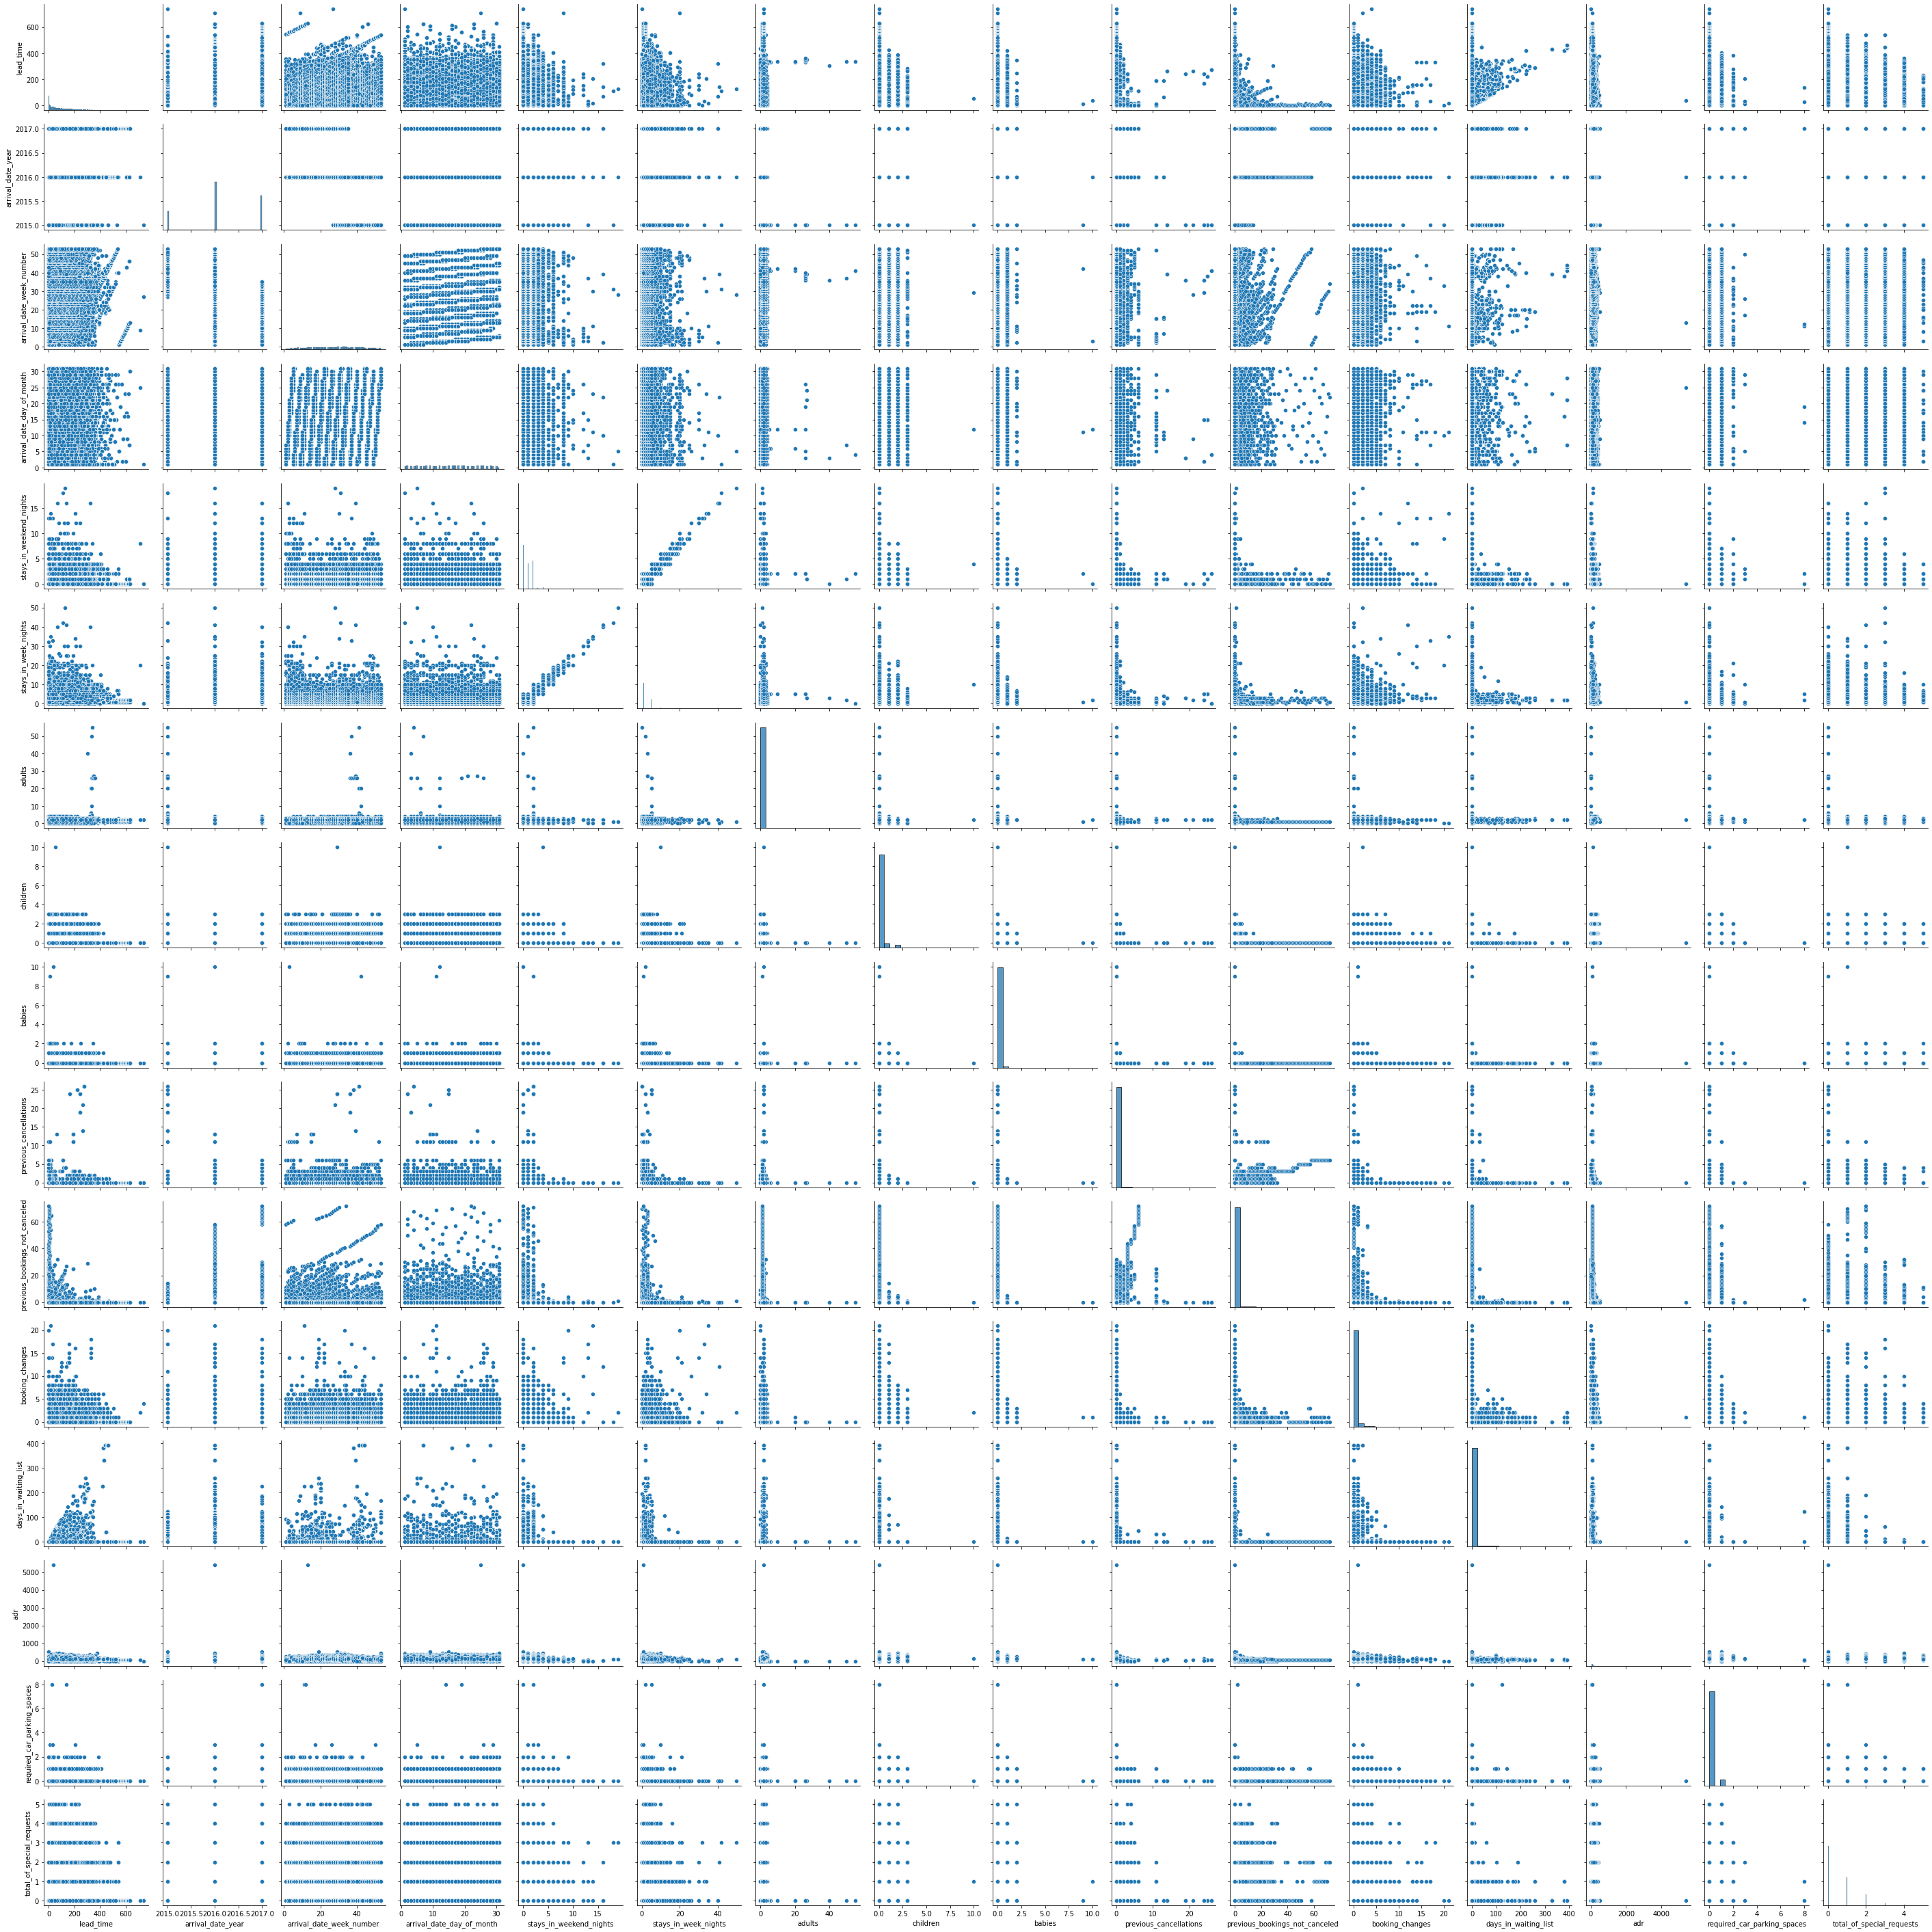

In [11]:
import seaborn as sns

_ = sns.pairplot(data[numcols])

As the 'arrival_date_year' represents the year of arrival date from a dataset with hotel bookings between the 1st of July 2015 and 31st of August 2017, we believe it would be better to consider 'arrival_date_year' as a categorical variables with values [2015, 2016, 2017]. Additionally, we can observe presence outliers from the pairplot such as the value with 'children' = 10. Therefore, we will observe the effects of these points later in the study.

In [11]:
catcols.append('arrival_date_year')
numcols.remove('arrival_date_year')

lead_time


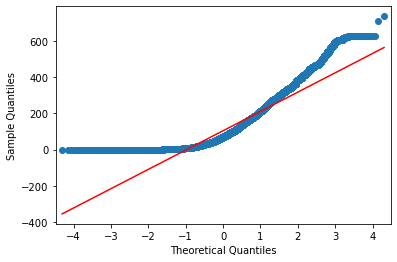

arrival_date_week_number


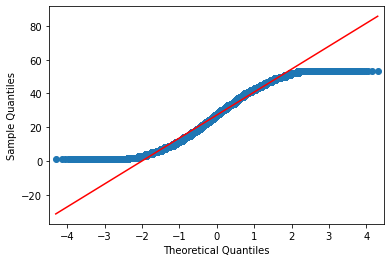

arrival_date_day_of_month


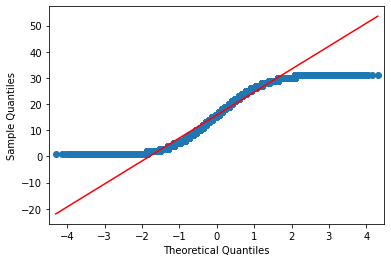

stays_in_weekend_nights


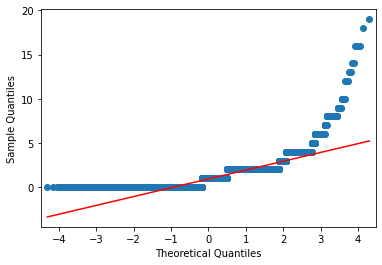

stays_in_week_nights


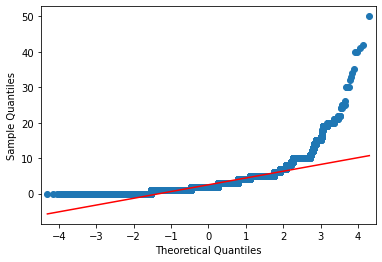

adults


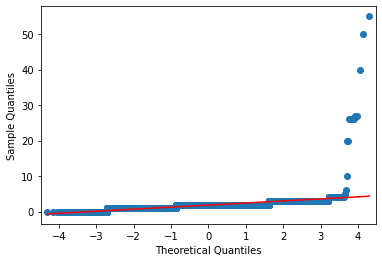

children


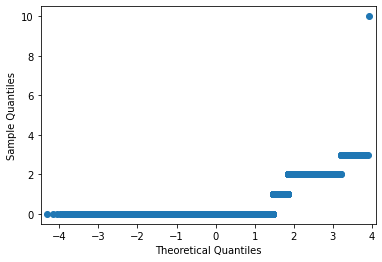

babies


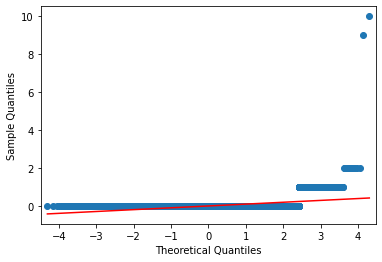

previous_cancellations


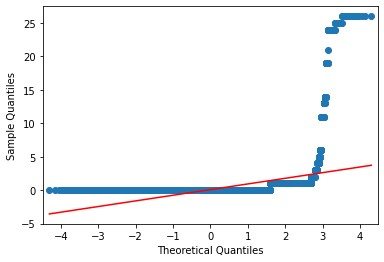

previous_bookings_not_canceled


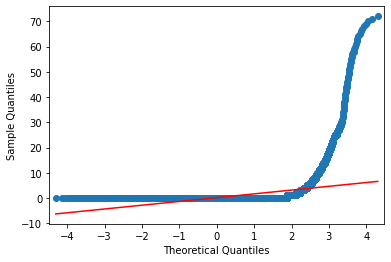

booking_changes


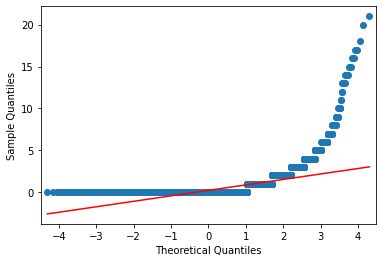

days_in_waiting_list


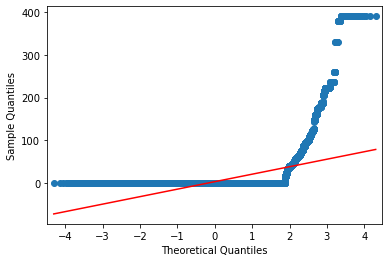

adr


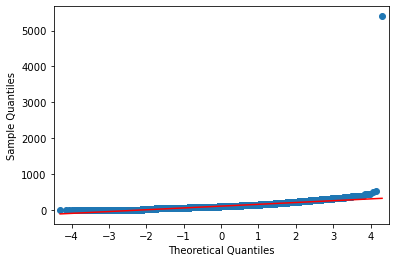

required_car_parking_spaces


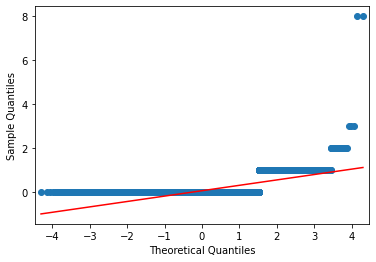

total_of_special_requests


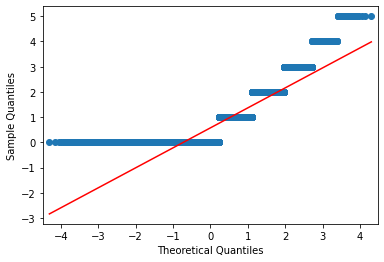

In [12]:
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

for col in data[numcols].columns:
  print(col)
  qqplot(data[col], line='s')
  plt.show()

Our QQ-plot shows that the columns have a right-skewed distributions as the plots have a long tail to the right. Additionally, we observe no negative values.

Now, we will look the the distribution of categorical variables.

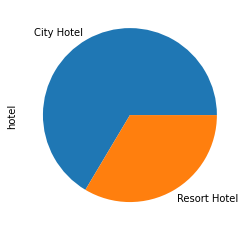

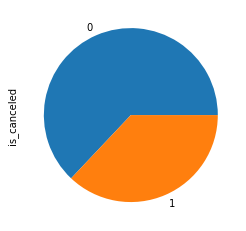

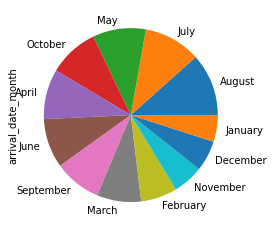

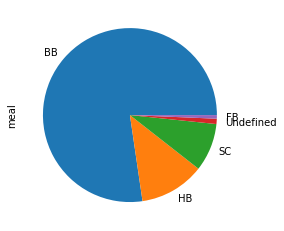

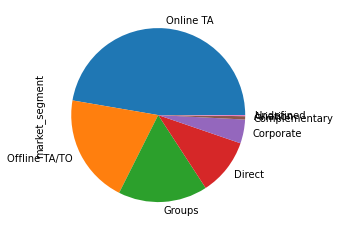

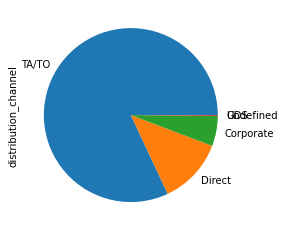

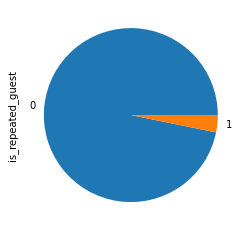

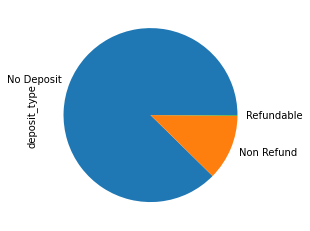

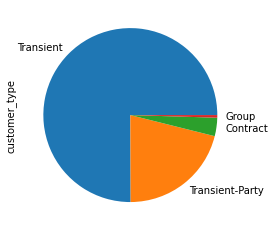

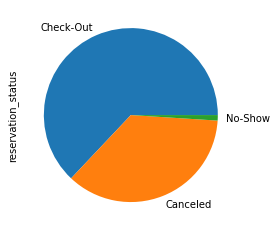

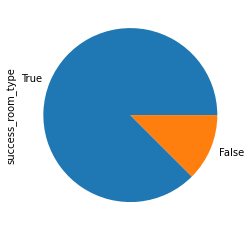

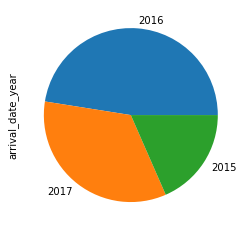

In [13]:
for col in data[catcols].columns:
  data[col].value_counts().plot.pie()
  plt.show()

We do see some values as 'Undefined' is categories such as meal, distribution_channel, and market_segment. However, we will wait until our model fitting to consider these values as the categories mentioned above may not be relevant.

Now, we will look at any column with NaN values.

In [14]:
nan_cols = data.loc[:, data.isnull().any(axis=0)]
print(nan_cols)

        children
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
...          ...
119385       0.0
119386       0.0
119387       0.0
119388       0.0
119389       0.0

[119390 rows x 1 columns]


In [15]:
data['children'].isnull().sum()

4

In [16]:
s = data[data.isna().any(axis=1)][['hotel', 'is_canceled', 'lead_time', 'children', 'distribution_channel']]
print(s)

            hotel  is_canceled  lead_time  children distribution_channel
40600  City Hotel            1          2       NaN            Undefined
40667  City Hotel            1          1       NaN            Undefined
40679  City Hotel            1          1       NaN            Undefined
41160  City Hotel            1          8       NaN            Undefined


From here we observe that the four columns that have NaN values in the 'children' column also has a value 'Undefined' for the 'distribution_channel' variable. Therefore, we decided to drop these four rows in our study.

In [17]:
data = data.dropna()

## Data Preprocessing

To preprocess categorical variables, we will need to identify their unique values.

In [18]:
for col in catcols:
  print(col, data[col].unique())


hotel ['Resort Hotel' 'City Hotel']
is_canceled [0 1]
arrival_date_month ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal ['BB' 'FB' 'HB' 'SC' 'Undefined']
market_segment ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation']
distribution_channel ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
is_repeated_guest [0 1]
deposit_type ['No Deposit' 'Refundable' 'Non Refund']
customer_type ['Transient' 'Contract' 'Transient-Party' 'Group']
reservation_status ['Check-Out' 'Canceled' 'No-Show']
success_room_type [ True False]
arrival_date_year [2015 2016 2017]


From these columns, we decided to encode the set of categories to be 0~(n_classes-1) for 'hotel', 'arrival_date_month', 'success_room_type', and 'arrival_date_year'. However, for the rest of the columns, we decided to do one-hot encoding as the unique values of their corresponding columns were not instinctively numerically orderable. 

In [19]:
remap = {
    "hotel": {"Resort Hotel": 0, "City Hotel": 1},
    "arrival_date_month": {"January": 0, "February": 1, "March": 2, "April": 3,
                           "May": 4, "June": 5, "July": 6, "August": 7,
                           "September": 8, "October": 9, "November": 10,
                           "December": 11},
    "success_room_type": {True: 0, False: 1},
    "arrival_date_year": {2015:0, 2016:1, 2017:2}
}
data = data.replace(remap)
display(data.head(10))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,success_room_type
0,0,0,342,0,6,27,1,0,0,2,...,0,3,No Deposit,0,Transient,0.0,0,0,Check-Out,0
1,0,0,737,0,6,27,1,0,0,2,...,0,4,No Deposit,0,Transient,0.0,0,0,Check-Out,0
2,0,0,7,0,6,27,1,0,1,1,...,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out,1
3,0,0,13,0,6,27,1,0,1,1,...,0,0,No Deposit,0,Transient,75.0,0,0,Check-Out,0
4,0,0,14,0,6,27,1,0,2,2,...,0,0,No Deposit,0,Transient,98.0,0,1,Check-Out,0
5,0,0,14,0,6,27,1,0,2,2,...,0,0,No Deposit,0,Transient,98.0,0,1,Check-Out,0
6,0,0,0,0,6,27,1,0,2,2,...,0,0,No Deposit,0,Transient,107.0,0,0,Check-Out,0
7,0,0,9,0,6,27,1,0,2,2,...,0,0,No Deposit,0,Transient,103.0,0,1,Check-Out,0
8,0,1,85,0,6,27,1,0,3,2,...,0,0,No Deposit,0,Transient,82.0,0,1,Canceled,0
9,0,1,75,0,6,27,1,0,3,2,...,0,0,No Deposit,0,Transient,105.5,0,0,Canceled,0


In [20]:
onehotcols = ['meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']
data_NOT_onehot = data.copy().drop(columns=onehotcols)
data_onehot = data[onehotcols]

data = pd.concat([data_NOT_onehot, pd.get_dummies(data_onehot)], axis=1)
display(data.head(10))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,0,342,0,6,27,1,0,0,2,...,1,0,0,0,0,1,0,0,1,0
1,0,0,737,0,6,27,1,0,0,2,...,1,0,0,0,0,1,0,0,1,0
2,0,0,7,0,6,27,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
3,0,0,13,0,6,27,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
4,0,0,14,0,6,27,1,0,2,2,...,1,0,0,0,0,1,0,0,1,0
5,0,0,14,0,6,27,1,0,2,2,...,1,0,0,0,0,1,0,0,1,0
6,0,0,0,0,6,27,1,0,2,2,...,1,0,0,0,0,1,0,0,1,0
7,0,0,9,0,6,27,1,0,2,2,...,1,0,0,0,0,1,0,0,1,0
8,0,1,85,0,6,27,1,0,3,2,...,1,0,0,0,0,1,0,1,0,0
9,0,1,75,0,6,27,1,0,3,2,...,1,0,0,0,0,1,0,1,0,0


As stated in above section, we will be scaling our data through Min Max normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
display(scaled_data.head(10))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0.0,0.0,0.464043,0.0,0.545455,0.5,0.0,0.0,0.00,0.036364,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.000000,0.0,0.545455,0.5,0.0,0.0,0.00,0.036364,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.009498,0.0,0.545455,0.5,0.0,0.0,0.02,0.018182,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.017639,0.0,0.545455,0.5,0.0,0.0,0.02,0.018182,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.018996,0.0,0.545455,0.5,0.0,0.0,0.04,0.036364,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.018996,0.0,0.545455,0.5,0.0,0.0,0.04,0.036364,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.000000,0.0,0.545455,0.5,0.0,0.0,0.04,0.036364,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.012212,0.0,0.545455,0.5,0.0,0.0,0.04,0.036364,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.0,1.0,0.115332,0.0,0.545455,0.5,0.0,0.0,0.06,0.036364,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,0.0,1.0,0.101764,0.0,0.545455,0.5,0.0,0.0,0.06,0.036364,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Model 1: Logisitic Regression

In [52]:
import seaborn as sns

_ = sns.pairplot(data, hue='is_canceled')


KeyboardInterrupt



Error in callback <function flush_figures at 0x00000242CFCBA040> (for post_execute):



KeyboardInterrupt



In [335]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split

In [363]:
X = scaled_data.drop(['reservation_status_Canceled', 'reservation_status_Check-Out','reservation_status_No-Show','is_canceled']
                     ,axis= 1)
y = scaled_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=17)
model_log = LogisticRegression(penalty='none', max_iter=100, solver='newton-cg').fit(X_train, y_train)
predict_model = model_log.predict(X_test)
print(classification_report(y_test,predict_model))
predict_model2 = model_log.predict(X_train)
print(classification_report(y_train,predict_model2))

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86     14877
         1.0       0.84      0.62      0.72      9001

    accuracy                           0.81     23878
   macro avg       0.82      0.78      0.79     23878
weighted avg       0.82      0.81      0.81     23878

              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86     60289
         1.0       0.83      0.62      0.71     35219

    accuracy                           0.81     95508
   macro avg       0.82      0.77      0.79     95508
weighted avg       0.82      0.81      0.81     95508



First, we run a general logistic regression model with all of our features. We find that with all of our features, the maximum accuracy to predict if a person will cancel or not cancel their booking is about 81%.

In [378]:
from sklearn.metrics import log_loss
loss =[]

model_log = LogisticRegression(penalty='none', max_iter=1000, solver='newton-cg').fit(X_train, y_train)
predict_model = model_log.predict_proba(X_test)
print(log_loss(y_test,predict_model))
predict_model2 = model_log.predict_proba(X_train)
print(log_loss(y_train,predict_model2))

0.4189670238060458
0.41649196907511754


We find that both our testing and training error is pretty similar, meaning that the model has accurately predicted similarly for both testing and training. In addition, our error is small enough that is not underfitting but is not close to zero meaning that we are not overfitting.

<AxesSubplot:>

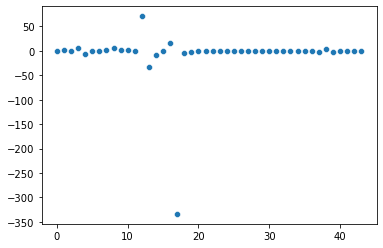

In [340]:
sns.scatterplot(x = list(range(0,len(model_log.coef_[0]))),y = model_log.coef_[0])

In [341]:
for i in range(0,len(model_log.coef_[0])):
    if model_log.coef_[0][i] > 50 or model_log.coef_[0][i] < -30:
        print(model_log.feature_names_in_[i] , str(model_log.coef_[0][i]))

previous_cancellations 70.92972776032559
previous_bookings_not_canceled -33.34892348914294
required_car_parking_spaces -333.61572861530607


Looking at the scatter plot we find that the most influential features in our model are : previous_cancellations, previous_bookings_not_canceled and required_car_parking_spaces.

In [342]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
cv = KFold(n_splits= 87, random_state=1, shuffle=True)
scores = cross_val_score(model_log, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.814 (0.009)


By using k-fold we end up with a similar accuracy as shown in our logistic model.

C:\Users\Erick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


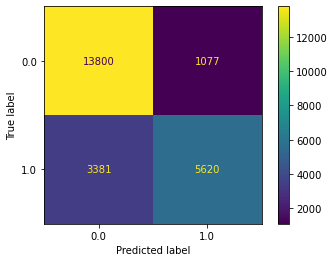

In [343]:
confusion_matrix(y, model_log.predict(X))
plot_confusion_matrix(model_log, X_test, y_test)

C:\Users\Erick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


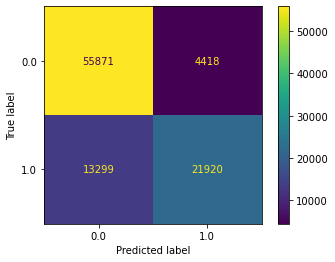

In [344]:
plot_confusion_matrix(model_log, X_train, y_train)

17717 mispredictions out of 95508 attempts


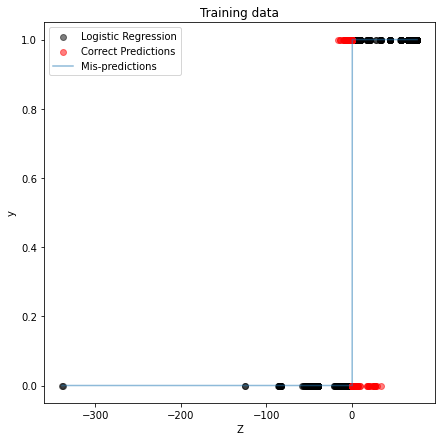

4458 mispredictions out of 23878 attempts


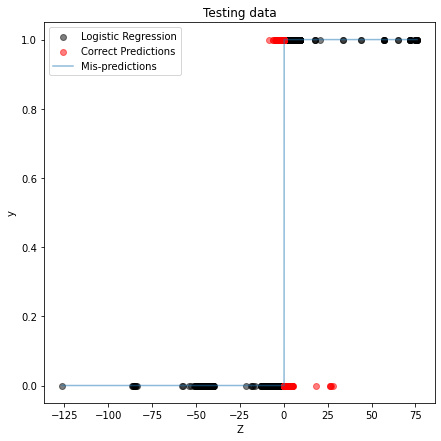

In [345]:
def plotSKLogistic(x, y, model, figsize=7, title='Training data'):
    plt.figure(figsize=(figsize,figsize))
    pred = x[(model.predict(x) == y)]
    misPred = x[(model.predict(x) != y)]
    print(f'{misPred.shape[0]} mispredictions out of {x.shape[0]} attempts')

    plt.scatter(np.dot(pred, model.coef_.T), model.predict(pred), color='k', alpha=.5)
    if misPred.shape[0] > 0:
        plt.scatter(np.dot(misPred, model.coef_.T), 1 - model.predict(misPred), color='r', alpha=.5)

    line = sorted(zip(np.dot(x, model.coef_.T), model.predict(x)))
    line_x, line_y = zip(*line)
    plt.plot(line_x, line_y, color='tab:blue', alpha=.5)

    plt.xlabel("Z")
    plt.ylabel("y")
    plt.legend(['Logistic Regression', 'Correct Predictions', 'Mis-predictions'])
    plt.title(title)
    plt.show()
plotSKLogistic(X_train, y_train, model_log)
plotSKLogistic(X_test, y_test, model_log, title='Testing data')

In [346]:
from sklearn.feature_selection import chi2

scores, pvalues = chi2(X, y)
lst = []
for i in range(0,len(model_log.coef_[0])):
    if pvalues[i] > 0.05:
        print(model_log.feature_names_in_[i],"B"+str(i)+ ':',model_log.coef_[0][i],"\nP-value:",pvalues[i])
    elif pvalues[i] < 0.05:
        lst.append(model_log.feature_names_in_[i])

arrival_date_month B3: 6.458054985405658 
P-value: 0.1327606311496687
arrival_date_week_number B4: -6.897082815285908 
P-value: 0.30002502531958924
arrival_date_day_of_month B5: 0.5770388980304182 
P-value: 0.38099453842199327
stays_in_weekend_nights B6: 0.7603954744431352 
P-value: 0.8834673350415122
stays_in_week_nights B7: 1.5982472148268578 
P-value: 0.14407263756082106
adults B8: 6.7905305617458405 
P-value: 0.23472845311728802
children B9: 1.3697392806399544 
P-value: 0.4952385515928017
adr B16: 16.2796745300474 
P-value: 0.27698115973775744
meal_SC B23: 0.046931306480719845 
P-value: 0.6692134412009579
market_segment_Online TA B31: 0.6386833642623317 
P-value: 0.11588471109884327
distribution_channel_Undefined B36: -0.037193033003618994 
P-value: 0.44307806577100894


We decide to run the p-values test for the logistic regression with a significance of α=0.05. In this case, we find that for the features:arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights, adults, children,adr,meal_SC,market_segment_Online, and distribution_channel_UndefinedWe fail to reject the null hypothesis for these features. At a significance α=0.05, we can conclude that these features have no effect on predicting if a booking is canceled or not.


We fail to reject the null hypothesis for these features. At significant $\alpha = 0.05$, we can conclude that thess features have not effect on predicting if a booking is canceled or not.

In [348]:
print(model_log.intercept_)
print(model_log.coef_)

[-0.15502852]
[[-1.42658386e-01  2.57144050e+00  1.75480691e-02  6.45805499e+00
  -6.89708282e+00  5.77038898e-01  7.60395474e-01  1.59824721e+00
   6.79053056e+00  1.36973928e+00  2.43157850e+00 -6.59607732e-01
   7.09297278e+01 -3.33489235e+01 -7.49766098e+00  6.30394981e-02
   1.62796745e+01 -3.33615729e+02 -3.53108741e+00 -1.80425469e+00
  -5.89677678e-02  6.28128537e-01 -1.74242050e-01  4.69313065e-02
  -5.96878541e-01 -2.21342351e-01  4.93222678e-01 -3.05622004e-01
  -4.41150315e-02 -7.07041740e-02 -6.45150997e-01  6.38683364e-01
   4.66455684e-01 -1.65039893e-01 -6.85429055e-01  2.66177781e-01
  -3.71930330e-02 -1.93173133e+00  3.55207493e+00 -1.77537211e+00
  -3.46448885e-01 -3.92880037e-01  5.15121399e-01  6.91790081e-02]]


In [381]:
X = scaled_data[lst]
y = scaled_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=17)
model_log = LogisticRegression(penalty='none', max_iter=1000, solver='newton-cg').fit(X_train, y_train)
predict_model = model_log.predict(X_test)
print(classification_report(y_test,predict_model))
predict_model2 = model_log.predict(X_train)
print(classification_report(y_train,predict_model2))


              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86     14877
         1.0       0.83      0.63      0.72      9001

    accuracy                           0.81     23878
   macro avg       0.82      0.78      0.79     23878
weighted avg       0.81      0.81      0.81     23878

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86     60289
         1.0       0.82      0.63      0.71     35219

    accuracy                           0.81     95508
   macro avg       0.82      0.78      0.79     95508
weighted avg       0.81      0.81      0.81     95508



Our conclusion for our original model hypothesis is accurate since we drop the features and we find the model keeps a mostly similar result and accuracy to determine the booking of a hotel.

In [382]:
model_log = LogisticRegression(penalty='none', max_iter=1000, solver='newton-cg').fit(X_train, y_train)
predict_model = model_log.predict_proba(X_test)
print("testing error:",log_loss(y_test,predict_model))
predict_model2 = model_log.predict_proba(X_train)
print("Training error:",log_loss(y_train,predict_model2))


testing error: 0.421971097680242
Training error: 0.41960960291626187


We find that our error is slightly higher than in our previous model but they are similar in both testing and error enough meaning that the prediction has been done accurately for both samples. In this case, the higher error can be beneficial since it can show we were actually overfitting with our previous model.

<AxesSubplot:>

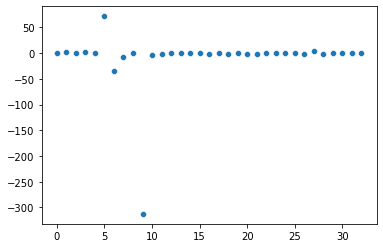

In [314]:
sns.scatterplot(x = list(range(0,len(model_log.coef_[0]))),y = model_log.coef_[0])

Looking at the scatter plot again we find the most influential features in our model to be: previous_cancellations, previous_bookings_not_canceled and required_car_parking_spaces.

In [315]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
cv = KFold(n_splits=63, random_state=17, shuffle=True)
scores = cross_val_score(model_log, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.814 (0.008)


We find slightly less standard error in this case since we used the best model to predict out hotel booking.

C:\Users\Erick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


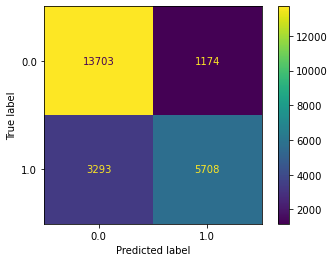

In [318]:
confusion_matrix(y, model_log.predict(X))
plot_confusion_matrix(model_log, X_test, y_test)

C:\Users\Erick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


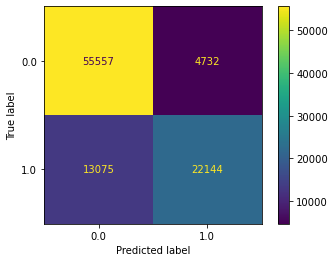

In [319]:
confusion_matrix(y, model_log.predict(X))
plot_confusion_matrix(model_log, X_train, y_train)

17807 mispredictions out of 95508 attempts


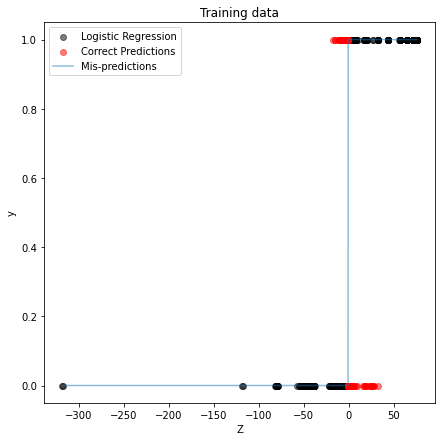

4467 mispredictions out of 23878 attempts


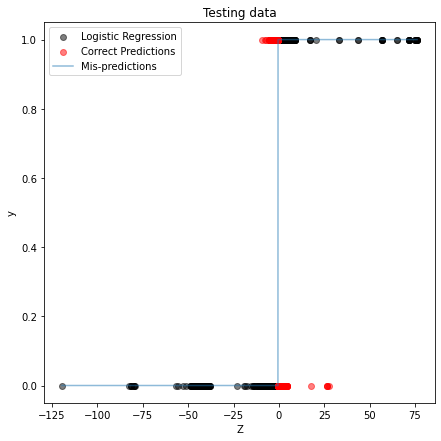

In [317]:
plotSKLogistic(X_train, y_train, model_log)
plotSKLogistic(X_test, y_test, model_log, title='Testing data')

In [321]:
X = scaled_data[['previous_cancellations','previous_bookings_not_canceled','required_car_parking_spaces']]
y = scaled_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=17)
model_log = LogisticRegression(penalty='none', max_iter=1000, solver='newton-cg').fit(X_train, y_train)
predict_model = model_log.predict(X_test)
print(classification_report(y_test,predict_model))
predict_model2 = model_log.predict(X_train)
print(classification_report(y_train,predict_model2))


              precision    recall  f1-score   support

         0.0       0.66      1.00      0.79     14877
         1.0       0.98      0.14      0.24      9001

    accuracy                           0.67     23878
   macro avg       0.82      0.57      0.52     23878
weighted avg       0.78      0.67      0.58     23878

              precision    recall  f1-score   support

         0.0       0.66      1.00      0.80     60289
         1.0       0.98      0.13      0.23     35219

    accuracy                           0.68     95508
   macro avg       0.82      0.57      0.52     95508
weighted avg       0.78      0.68      0.59     95508



We have decided to try a different model with only the relevant features expressed on the scatter plot. As we suspected, even though these features have large coefficients they still are not enough to predict hotel booking cancellations.

In [ ]:
sns.scatterplot(x = list(range(0,len(model_log.coef_[0]))),y = model_log.coef_[0])

C:\Users\Erick\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


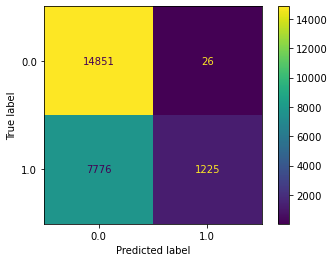

In [323]:
plot_confusion_matrix(model_log, X_test, y_test)

In [352]:
X = scaled_data[lst]
y = scaled_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=17)
model_log = LogisticRegression(penalty='none', max_iter=1000, solver='newton-cg').fit(X_train, y_train)


array([0.53978821])

In [359]:
print("B0",model_log.intercept_[0])

B0 0.5397882116557843


In [360]:
for i in range(0,len(model_log.coef_[0])):
    if model_log.coef_[0][i]> 30 or model_log.coef_[0][i] < -30:
        print(model_log.feature_names_in_[i],"B"+str(i)+ ':',model_log.coef_[0][i])

previous_cancellations B5: 71.55964521227045
previous_bookings_not_canceled B6: -34.08243649520303
required_car_parking_spaces B9: -312.68227554929257


Going back to our model with our best accuracy. We find that for the three most essential features, required car parking spaces have a higher coefficient which shows a great correlation to not cancel the booking. This is because people who reserve more parking spaces are more likely to not cancel the reservation whereas people that do not have parking spaces have the opposite effect. The second highest is previous_cancellations which indicates that if a person has a previous cancellation, they are most likely to cancel again. Therefore it increases the likelihood of a reservation being canceled. Finally, the third highest feature, previous_boo kings_not _canceled shows that if a person has not canceled previously, then they are most likely to not cancel again in their next booking. This means that a person who has a parking spot reserved and has not canceled before is probably not going to cancel their reservation. On the other hand, if a person has canceled before and they do not have reserved parking spaces, they are likely to cancel the booking.